In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sym_msm.decomposition.sym_mds import symmetric_mds, permute_stride_matrix

/Users/scottzhuang/anaconda3/envs/md_run/lib/python3.10/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
# sample from a gaussian distribution
n_samples = 1000
subunit_value = np.random.normal(1, 0.1, n_samples)

In [3]:
symmetric_traj = np.tile(subunit_value, (5,1)).T

# add noise
symmetric_traj += np.random.normal(0, 0.01, symmetric_traj.shape)
symmetric_traj = permute_stride_matrix(symmetric_traj, 1)

# asymmetric subunit
asymmetric_subunit_value = np.random.uniform(0.1, 0.01, n_samples)

asymmetric_traj_1 = np.tile(subunit_value, (5,1)).T
asymmetric_traj_1[:,0] += asymmetric_subunit_value 

# add noise
asymmetric_traj_1 += np.random.normal(0, 0.01, asymmetric_traj_1.shape)
asymmetric_traj_1 = permute_stride_matrix(asymmetric_traj_1, 1)

asymmetric_traj_2 = np.tile(subunit_value, (5,1)).T
asymmetric_traj_2[:,0] += asymmetric_subunit_value * 2

# add noise
asymmetric_traj_2 += np.random.normal(0, 0.01, asymmetric_traj_2.shape)
asymmetric_traj_2 = permute_stride_matrix(asymmetric_traj_2, 1)

asymmetric_traj_3 = np.tile(subunit_value, (5,1)).T
asymmetric_traj_3[:,0] += asymmetric_subunit_value * 5

# add noise
asymmetric_traj_3 += np.random.normal(0, 0.01, asymmetric_traj_3.shape)
asymmetric_traj_3 = permute_stride_matrix(asymmetric_traj_3, 1)

In [4]:
sym_pcs = symmetric_mds(symmetric_traj)
asym_1_pcs = symmetric_mds(asymmetric_traj_1)
asym_2_pcs = symmetric_mds(asymmetric_traj_2)
asym_3_pcs = symmetric_mds(asymmetric_traj_3)

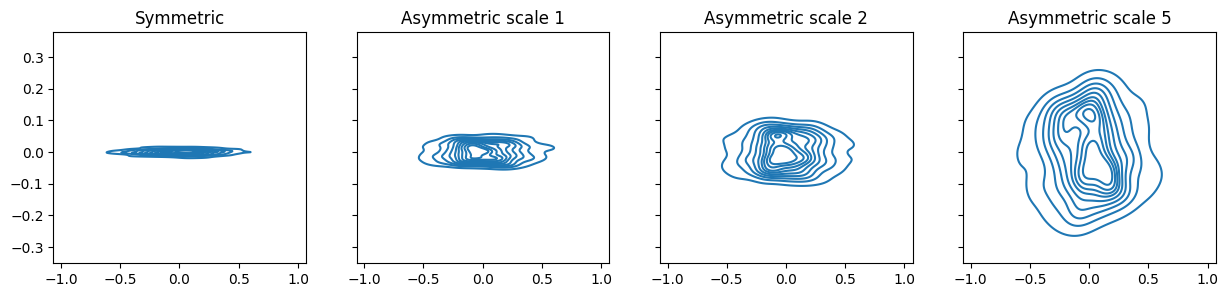

In [5]:
fig, axes = plt.subplots(1,4, sharex=True, sharey=True, figsize=(15,3))
sns.kdeplot(x=sym_pcs[:,0],
            y=sym_pcs[:,1],
            ax=axes[0])
axes[0].set_title('Symmetric')
sns.kdeplot(x=asym_1_pcs[:,0],
            y=asym_1_pcs[:,1],
            ax=axes[1])
axes[1].set_title('Asymmetric scale 1')
sns.kdeplot(x=asym_2_pcs[:,0],
            y=asym_2_pcs[:,1],
            ax=axes[2])
axes[2].set_title('Asymmetric scale 2')
sns.kdeplot(x=asym_3_pcs[:,0],
            y=asym_3_pcs[:,1],
            ax=axes[3])
axes[3].set_title('Asymmetric scale 5')
plt.show()